In [ ]:
# basin-entropy-scan.ipynb
#
# Bryan Daniels, Enrico Borriello
# 2023/8/31
#

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CK_vs_entropy_data_scan.csv')

In [226]:
df.groupby(['n','r']).count().ck_mean_size

n   r  
8   2      1000
    5      1000
    10     1000
    20     1000
    50     1000
    100     950
9   2      1000
    5      1000
    10     1000
    20     1000
    50      980
    100    1000
10  2      1000
    5      1000
    10     1000
    20     1000
    50     1000
    100     980
11  2      1000
    5      1000
    10     1000
    20     1000
    50     1000
    100    1000
12  2      1000
    5      1000
    10      173
Name: ck_mean_size, dtype: int64

In [180]:
df_mean = df.groupby(['n','r','eta_tilde']).mean()
df_std = df.groupby(['n','r','eta_tilde']).std()

/var/folders/2y/r9yfmnys37xd00fknrv2tgym0000gn/T/ipykernel_95067/998472807.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby(['n','r','eta_tilde']).mean()
/var/folders/2y/r9yfmnys37xd00fknrv2tgym0000gn/T/ipykernel_95067/998472807.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_std = df.groupby(['n','r','eta_tilde']).std()


In [250]:
def ck_vs_eta_plot(df,n,r,theta_fit=None,xvar='normalized eta'):
    df_subset = df[np.logical_and(df.n==n,df.r==r)]
    df_subset_mean = df_mean.loc[n,r]
    df_subset_std = df_std.loc[n,r]
    df_subset.plot.scatter(xvar,'ck_mean_size',s=1)
    plt.errorbar(df_subset_mean[xvar],df_subset_mean['ck_mean_size'],
                 yerr=df_subset_std.ck_mean_size,ls='')
#     plt.hlines([np.log2(r)],xmin=min(df_subset.eta),xmax=max(df_subset.eta),color='k')
#     plt.hlines([np.log2(r)-1],xmin=min(df_subset.eta),xmax=max(df_subset.eta),color='k',ls='--')
#     plt.hlines([np.log2(r)+1],xmin=min(df_subset.eta),xmax=max(df_subset.eta),color='k',ls='--')
    plt.hlines([np.log2(r)],xmin=0,xmax=1,color='k')
    plt.hlines([np.log2(r)-1],xmin=0,xmax=1,color='k',ls='--')
    plt.hlines([np.log2(r)+1],xmin=0,xmax=1,color='k',ls='--')
    
    if theta_fit is not None:
        # include linear model fit
        
        normed_etas = np.linspace(0,1,100)
        predicted_ck_size = np.log2(r) + theta_fit[0] + theta_fit[1]*normed_etas + theta_fit[2]*n + theta_fit[3]*r
        plt.plot(normed_etas,predicted_ck_size,lw=4)
        
#         etas = np.linspace(min(df_subset.eta),max(df_subset.eta),100)
#         predicted_ck_size = np.log2(r) + theta_fit[0] + theta_fit[1]*etas/r + theta_fit[2]*n
#         plt.plot(etas,predicted_ck_size,lw=4)

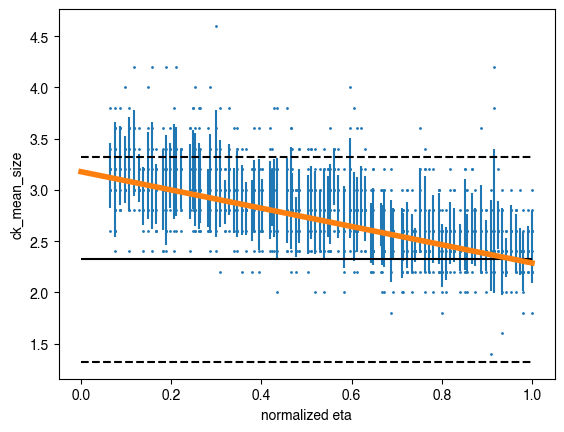

In [256]:
n = 8
r = 5
ck_vs_eta_plot(df,n,r,theta_fit)

In [270]:
np.meshgrid(X, Y)[0]

array([[0.01118379, 0.02041134, 0.02889965, ..., 0.98319754, 0.99220133,
        1.        ],
       [0.01118379, 0.02041134, 0.02889965, ..., 0.98319754, 0.99220133,
        1.        ],
       [0.01118379, 0.02041134, 0.02889965, ..., 0.98319754, 0.99220133,
        1.        ],
       ...,
       [0.01118379, 0.02041134, 0.02889965, ..., 0.98319754, 0.99220133,
        1.        ],
       [0.01118379, 0.02041134, 0.02889965, ..., 0.98319754, 0.99220133,
        1.        ],
       [0.01118379, 0.02041134, 0.02889965, ..., 0.98319754, 0.99220133,
        1.        ]])

In [271]:
df_mean

eta    seed  ck_mean_size     log2r  \
n  r  eta_tilde                                             
8  2  0.036875   0.036875  1004.5      2.400000  1.000000   
      0.046603   0.036875  1004.5      2.200000  1.000000   
      0.056332   0.065914  1004.5      2.050000  1.000000   
      0.066060   0.065914  1004.5      2.050000  1.000000   
      0.075789   0.065914  1004.5      1.750000  1.000000   
...                   ...     ...           ...       ...   
12 10 0.461868   0.461414  1004.5      4.250000  3.321928   
      0.495125   0.496304  1004.5      4.280000  3.321928   
      0.528381   0.529153  1004.5      4.220000  3.321928   
      0.561638   0.563101  1004.5      4.160000  3.321928   
      0.594894   0.595812  1001.0      3.766667  3.321928   

                 ck_mean_size_minus_log2r  normalized eta  
n  r  eta_tilde                                            
8  2  0.036875                   1.400000        0.036901  
      0.046603                   1.200000        0.036901  
      0.056332                   1.050000        0.065961  
      0.066060                   1.050000        0.065961  
      0.075789                   0.750000        0.065961  
...                                   ...             ...  
12 10 0.461868                   0.928072        0.774430  
      0.495125                   0.958072        0.832988  
      0.528381                   0.898072        0.888121  
      0.561638                   0.838072        0.945099  
      0.594894                   0.444739        1.000000  

[2609 rows x 6 columns]

In [287]:
# output for mathematica 3D plot
n = 10
df_mean_n = df_mean.loc[n].reset_index()[['normalized eta','r','ck_mean_size_minus_log2r']]
df_mean_n.to_csv('230831_mean_CK_vs_entropy_data.csv',index=False,header=False)
#pd.DataFrame.to_csv()

In [274]:
# trying to make 3D surface plot---difficult because we don't have the same ste of eta values for each value of r

n = 10
normed_etas = df_mean.loc[n].reset_index()['normalized eta']
rs = df_mean.loc[n].reset_index()['r']
Z = [[ df_mean.loc[n,r,normed_eta] for r in rs ] for normed_eta in normed_etas ]
X,Y = np.meshgrid(normed_etas, rs)

from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

KeyError: (10, 2, 0.011183791775920635)

/var/folders/2y/r9yfmnys37xd00fknrv2tgym0000gn/T/ipykernel_95067/586784285.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subset = df.groupby(['r','n']).mean().reset_index('n')


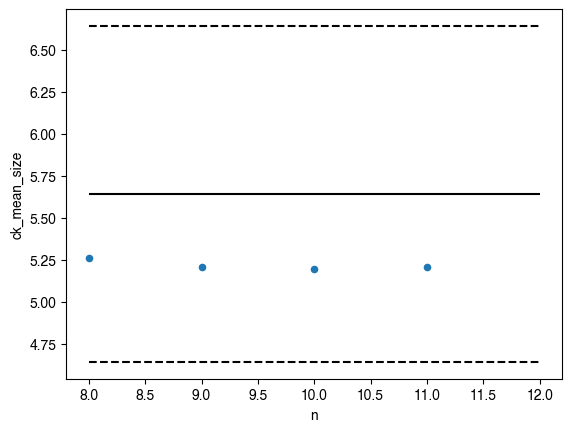

In [88]:
r = 50
df_subset = df.groupby(['r','n']).mean().reset_index('n')
df_subset.loc[r].plot.scatter('n','ck_mean_size')
plt.hlines([np.log2(r)],xmin=min(df_subset.n),xmax=max(df_subset.n),color='k')
plt.hlines([np.log2(r)-1],xmin=min(df_subset.n),xmax=max(df_subset.n),color='k',ls='--')
plt.hlines([np.log2(r)+1],xmin=min(df_subset.n),xmax=max(df_subset.n),color='k',ls='--')

In [92]:
def linear_fit(df,features_columns,output_column):
    # design matrix
    X = np.array(df[features_columns])
    ones = [[1]]*len(X)
    Xd = np.hstack((ones,X));

    # parameters
    theta = np.dot(np.dot(np.linalg.inv(np.dot(Xd.T,Xd)),Xd.T),df[output_column])
    
    return theta

In [231]:
# construct other features
df['log2r'] = np.log2(df['r'])
df['ck_mean_size_minus_log2r'] = df['ck_mean_size'] - df['log2r']
df['normalized eta'] = df[['n','r','eta']].groupby(['n','r']).transform(lambda x: x / x.max())
df['r/eta'] = df['r']/df['eta']

In [246]:
features = ['normalized eta','n','r']
theta_fit = linear_fit(df,features,'ck_mean_size_minus_log2r')
print(['bias'] + features)
print(theta_fit)

['bias', 'normalized eta', 'n', 'r']
[ 0.86631433 -0.8903174   0.00580825 -0.01142858]


In [210]:
df_features = [np.ones_like(df.n),df['normalized eta'],df.n,df.r]
df['predicted ck mean size'] = df.log2r + np.dot(theta_fit,df_features)

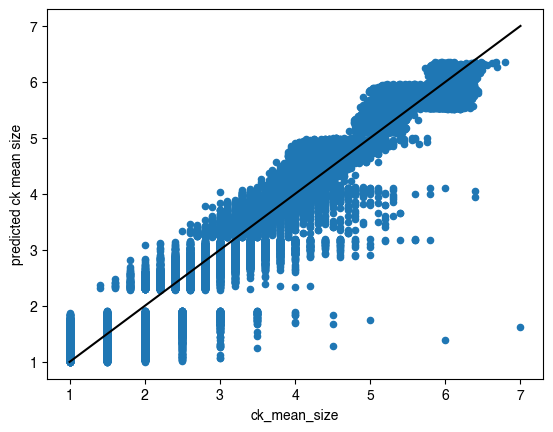

In [215]:
df.plot.scatter('ck_mean_size','predicted ck mean size')
plt.plot([1,7],[1,7],'k')